# `Xarray` 数据处理（2）
--------------------------

主讲人：李显祥

大气科学学院

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#xr.set_options(display_style="html")
%matplotlib inline

In [2]:
#air_temp = xr.tutorial.load_dataset('air_temperature')
air_temp = xr.open_dataset('air_temperature.nc')

## 7. 广播和对齐


* 可以直接在 `Dataset` 和 `DataArray` 对象上进行算术运算。
* 标签会被保留，在运算中 dataArray 的维度会自动对齐。

### 广播

<img src="./broadcast.png" width="５0%" align="left"> 

In [3]:
import numpy as np
import xarray as xr

a = xr.DataArray(np.arange(3), dims='time', 
                 coords={'time':np.arange(3)})
b = xr.DataArray(np.arange(4), dims='space', 
                 coords={'space':np.arange(4)})
a + b

<xarray.DataArray (time: 3, space: 4)>
array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5]])
Coordinates:
  * time     (time) int64 0 1 2
  * space    (space) int64 0 1 2 3

思考题 1：

b + a = ?

思考题 2：

```python
anomaly = air_temp.air - air_temp.air.mean(dim='time')
```

这里使用了广播吗？


### 对齐

<img src="./align.png" width="５0%" align="left"> 

In [4]:
atime = np.arange(3)
btime = np.arange(5) + 1
atime, btime

(array([0, 1, 2]), array([1, 2, 3, 4, 5]))

In [5]:
a = xr.DataArray(np.arange(3), dims='time', 
                 coords={'time':atime})
b = xr.DataArray(np.arange(5), dims='time', 
                 coords={'time':btime})
a + b

<xarray.DataArray (time: 2)>
array([1, 3])
Coordinates:
  * time     (time) int64 1 2

如果我们要保留所有坐标，怎么办呢？

In [6]:
# 也可以保留所有坐标
with xr.set_options(arithmetic_join="outer"):
    print(a + b)

<xarray.DataArray (time: 6)>
array([nan,  1.,  3., nan, nan, nan])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5


注意：没有对应坐标的点被设置为 `nan` 

### 使用 `.where()`　进行屏蔽

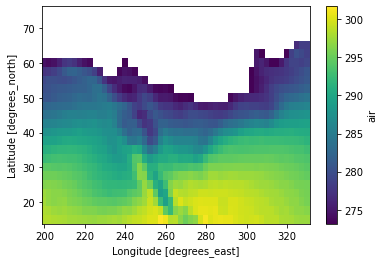

In [7]:
means = air_temp.air.mean(dim=['time'])
means.where(means > 273.15).plot()

## 8. 分组　Groupby


xarray 支持和 pandas 类似的分组（“group by”）操作来实现拆散－应用－合并： 

- 将数据根据一定的规则拆散为独立的组
- 对每个组应用某种函数
- 将这些组合并成一个单一的数据对象

分组操作对于 Dataset 和 DataArray 对象都适用。 

<img src="./split_apply-combine.png" alt="split" style="width: 50%;"/>

In [8]:
air_temp.air.mean(dim=['lat','lon']).groupby('time.season').mean()
# air_temp.air.groupby('time.season').mean().mean(dim=['lat','lon'])

<xarray.DataArray 'air' (season: 4)>
array([273.6497 , 289.2049 , 278.9914 , 283.02814], dtype=float32)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [9]:
clim = air_temp.air.groupby('time.month').mean('time')

In [10]:
clim

<xarray.DataArray 'air' (month: 12, lat: 25, lon: 53)>
array([[[246.34987, 246.38608, 246.21518, ..., 243.06113, 244.08795,
         245.6467 ],
        [248.8576 , 248.90733, 248.7104 , ..., 241.52866, 243.50865,
         246.75471],
        [251.57712, 251.19661, 250.71463, ..., 243.39891, 246.78462,
         251.56572],
        ...,
        [295.85028, 295.24405, 295.22684, ..., 295.18625, 294.65707,
         294.0485 ],
        [296.5446 , 296.46982, 296.15994, ..., 295.35593, 295.0812 ,
         294.53006],
        [297.15417, 297.2383 , 297.04892, ..., 296.01797, 295.77554,
         295.63647]],

       [[246.67715, 246.40576, 245.9484 , ..., 241.85838, 243.0021 ,
         244.44383],
        [247.8001 , 247.75992, 247.47757, ..., 240.64706, 242.26633,
         245.06662],
        [249.07079, 248.57234, 247.94254, ..., 242.42874, 245.33348,
         249.72273],
...
        [297.8426 , 297.1406 , 296.98773, ..., 297.96884, 297.56888,
         297.1611 ],
        [298.58783, 298.42026, 297.96896, ..., 298.16412, 298.19397,
         297.9083 ],
        [298.81143, 298.8566 , 298.62103, ..., 298.72955, 298.7519 ,
         298.8189 ]],

       [[247.971  , 248.02118, 247.91302, ..., 239.7719 , 241.02383,
         242.62823],
        [249.73361, 250.16037, 250.48581, ..., 238.78964, 240.96469,
         244.11626],
        [252.0296 , 251.53136, 251.36629, ..., 238.07542, 241.91293,
         247.06987],
        ...,
        [296.76508, 295.97668, 295.88922, ..., 296.45605, 296.09137,
         295.65756],
        [297.46814, 297.38025, 297.04428, ..., 296.8556 , 296.84668,
         296.52133],
        [297.8809 , 297.9868 , 297.77554, ..., 297.60034, 297.5655 ,
         297.53763]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

我们也可以对拆分的组应用算术运算

In [11]:
anomalies = air_temp.air.groupby('time.month') - clim

In [12]:
anomalies

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[ -5.149872  ,  -3.886078  ,  -2.7151794 , ..., -10.261139  ,
          -8.587952  ,  -7.046707  ],
        [ -5.057617  ,  -4.4073334 ,  -4.0104065 , ...,  -8.728668  ,
          -8.208664  ,  -7.454727  ],
        [ -1.5771179 ,  -1.3966217 ,  -1.8246307 , ..., -10.198914  ,
         -10.394623  ,  -9.865723  ],
        ...,
        [  0.74972534,   0.9559326 ,   1.1731567 , ...,   0.21374512,
           0.44293213,   0.65148926],
        [ -0.6445923 ,  -0.26983643,   0.6300659 , ...,   0.5440674 ,
           0.8187866 ,   0.6699219 ],
        [ -0.86416626,  -0.44830322,   0.05108643, ...,   0.88201904,
           1.0144653 ,   0.9635315 ]],

       [[ -4.249878  ,  -3.686081  ,  -3.1151886 , ..., -11.061127  ,
         -10.487961  ,  -9.84671   ],
        [ -5.257614  ,  -4.8073425 ,  -4.5104065 , ..., -10.528656  ,
         -11.008652  , -11.054718  ],
        [  1.622879  ,   1.6933899 ,   1.3853607 , ..., -12.598923  ,
         -13.394623  , -13.06572   ],
...
        [ -3.0750732 ,  -2.0867004 ,  -0.49923706, ...,  -1.3660583 ,
          -1.4013672 ,  -1.3675537 ],
        [ -1.1781311 ,  -0.19024658,   0.54571533, ...,  -1.5655823 ,
          -1.7566833 ,  -2.1313477 ],
        [ -0.09088135,   0.40319824,   0.714447  , ...,  -1.9103394 ,
          -2.0755005 ,  -2.3476257 ]],

       [[ -2.8809967 ,  -3.731186  ,  -4.6230316 , ...,   1.9180908 ,
           0.466156  ,  -0.8382416 ],
        [  0.15638733,  -0.8703766 ,  -2.09581   , ...,   0.800354  ,
          -0.6746979 ,  -2.4262695 ],
        [ 10.960388  ,  10.658646  ,  10.023697  , ...,   1.8145752 ,
           0.677063  ,  -0.7798767 ],
        ...,
        [ -2.9750671 ,  -2.2866821 ,  -0.79922485, ...,  -1.1660461 ,
          -1.0013733 ,  -0.9675598 ],
        [ -1.3781433 ,  -0.4902649 ,   0.14572144, ...,  -1.1655884 ,
          -1.1566772 ,  -1.3313293 ],
        [ -0.19088745,   0.10321045,   0.31445312, ...,  -1.1103516 ,
          -1.3754883 ,  -1.8476257 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
    month    (time) int64 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12 12

注意 xarray 自动改变了 clim 的 month 维度以适应 air 的 time 维度。这也是 xarray 的“广播”功能的优势之一：它会自动根据维度的名字来匹配，我们也不需要像 numpy 那样使用 reshape 来改变数组的形状或者插入一个长度为１的维度 。

(array([8.400000e+01, 9.000000e+02, 1.145500e+04, 9.761600e+04,
        5.205310e+05, 2.676686e+06, 4.679230e+05, 8.459900e+04,
        8.757000e+03, 4.490000e+02]),
 array([-33.740555 , -27.573364 , -21.406174 , -15.238983 ,  -9.071793 ,
         -2.904602 ,   3.2625885,   9.429779 ,  15.59697  ,  21.76416  ,
         27.93135  ], dtype=float32),
 <BarContainer object of 10 artists>)

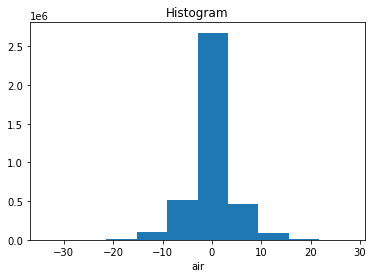

In [13]:
anomalies.plot()

(array([5.0000e+01, 7.0800e+02, 4.2130e+03, 1.4026e+04, 3.8860e+04,
        8.7334e+04, 1.4104e+04, 3.9360e+03, 9.3300e+02, 1.3600e+02]),
 array([-27.580475 , -22.353567 , -17.12666  , -11.899753 ,  -6.6728454,
         -1.4459381,   3.7809691,   9.007876 ,  14.234784 ,  19.46169  ,
         24.688599 ], dtype=float32),
 <BarContainer object of 10 artists>)

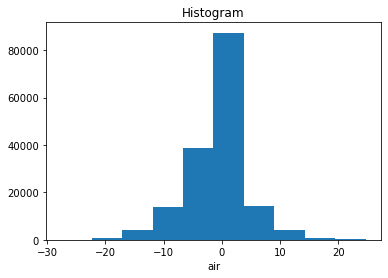

In [14]:
anomalies.sel(time='2013-12').plot()

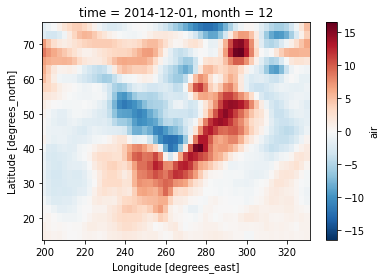

In [15]:
anomalies.sel(time='2014-12-01T00:00:00').plot(center=0)

注意这里 `anomalies`和上节课的 `anomalies` 的不同。

### 重采样 Resample

重采样将时间序列改变为新的时间间隔

In [16]:
tmin = air_temp.air.resample(time='1D').min()  # Resample to one day '1D
tmax = air_temp.air.resample(time='1D').max()

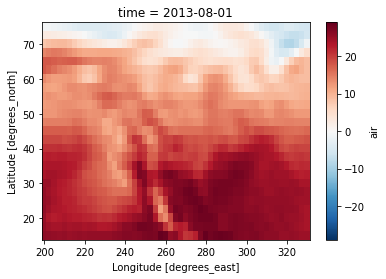

In [17]:
(tmin.sel(time='2013-08-01')-273.15).plot()

In [18]:
ds_extremes = xr.Dataset({'tmin': tmin, 'tmax': tmax})

In [19]:
ds_extremes

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 730)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2014-12-31
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Data variables:
    tmin     (time, lat, lon) float32 241.2 241.8 241.8 ... 295.7 295.5 295.2
    tmax     (time, lat, lon) float32 242.3 242.7 243.5 ... 296.6 296.2 295.8

In [20]:
ds_extremes.to_dataframe().head()

tmin        tmax
lat  lon   time                              
75.0 200.0 2013-01-01  241.199997  242.299988
           2013-01-02  243.199997  244.099991
           2013-01-03  242.599991  244.799988
           2013-01-04  247.299988  252.389999
           2013-01-05  242.799988  248.599991

如果我们要计算季节平均温度，但是季节不是从12月开始算，而是从1月份开始算，该怎么办？

In [21]:
tmean = air_temp.air.resample(time='QS-JAN').mean()
tmean

<xarray.DataArray 'air' (time: 8, lat: 25, lon: 53)>
array([[[244.61775, 244.4874 , 244.16472, ..., 242.67862, 243.6617 ,
         244.84286],
        [246.70831, 246.60774, 246.2854 , ..., 241.76208, 243.09488,
         245.42445],
        [249.80577, 249.27916, 248.56662, ..., 242.6106 , 245.18909,
         249.2116 ],
        ...,
        [295.54068, 294.8626 , 294.5957 , ..., 295.23795, 294.7679 ,
         294.27173],
        [296.29684, 296.1032 , 295.6412 , ..., 295.4861 , 295.27814,
         294.85345],
        [296.90457, 296.85693, 296.57358, ..., 296.13675, 295.94586,
         295.85483]],

       [[266.05133, 265.95355, 265.73987, ..., 255.27213, 256.4855 ,
         258.0242 ],
        [266.68463, 266.89017, 267.00583, ..., 254.36305, 256.30783,
         258.96777],
        [267.43503, 267.17825, 267.05594, ..., 255.34682, 258.0517 ,
         261.6338 ],
...
        [299.39444, 298.6934 , 298.25183, ..., 298.41876, 297.89505,
         297.44012],
        [299.58566, 299.3528 , 298.86545, ..., 298.13773, 298.18146,
         297.92966],
        [299.52676, 299.55106, 299.26666, ..., 298.4734 , 298.55417,
         298.6812 ]],

       [[254.5719 , 254.2065 , 253.78835, ..., 244.84901, 245.83794,
         247.16304],
        [258.69034, 258.4616 , 258.29688, ..., 243.59813, 245.36269,
         248.19038],
        [259.91925, 258.61987, 257.98532, ..., 243.66206, 247.11562,
         251.96043],
        ...,
        [298.0594 , 297.28436, 297.13278, ..., 297.8992 , 297.5463 ,
         297.1005 ],
        [298.82498, 298.7005 , 298.23013, ..., 298.11282, 298.20093,
         297.89267],
        [299.03397, 299.12115, 298.8528 , ..., 298.71136, 298.70218,
         298.74704]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-04-01 ... 2014-10-01
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

我们可以进一步求长期性的季节性平均（即季节性气候）：

In [22]:
tmean.groupby('time.month').mean()

<xarray.DataArray 'air' (month: 4, lat: 25, lon: 53)>
array([[[248.06451, 247.87129, 247.50122, ..., 242.38834, 243.41504,
         244.81207],
        [249.94589, 249.91418, 249.65762, ..., 241.28279, 242.95572,
         245.75687],
        [251.79315, 251.37738, 250.85794, ..., 242.50226, 245.54515,
         250.02003],
        ...,
        [295.80817, 295.299  , 295.20734, ..., 294.8109 , 294.21518,
         293.65   ],
        [296.67496, 296.5963 , 296.23596, ..., 294.91943, 294.63684,
         294.14258],
        [297.27472, 297.30914, 297.05096, ..., 295.5161 , 295.29193,
         295.1877 ]],

       [[266.2707 , 266.1467 , 265.92212, ..., 255.81694, 256.9698 ,
         258.4292 ],
        [267.29608, 267.4804 , 267.57135, ..., 254.85863, 256.7419 ,
         259.33945],
        [268.3296 , 268.1264 , 268.0636 , ..., 256.2502 , 258.92676,
         262.47302],
...
        [299.19385, 298.38416, 297.86572, ..., 298.37845, 297.90448,
         297.50476],
        [299.31348, 299.026  , 298.5249 , ..., 298.23846, 298.32867,
         298.1369 ],
        [299.2212 , 299.25613, 299.00455, ..., 298.67078, 298.75018,
         298.88126]],

       [[254.51819, 254.2999 , 253.97646, ..., 243.64935, 244.68417,
         246.07224],
        [259.2971 , 259.24634, 259.14093, ..., 242.3569 , 244.08167,
         246.92615],
        [260.90253, 259.7304 , 259.12848, ..., 242.1542 , 245.5603 ,
         250.43971],
        ...,
        [297.9024 , 297.14087, 296.95703, ..., 297.8386 , 297.45078,
         297.03668],
        [298.49506, 298.34576, 297.91656, ..., 298.09235, 298.10907,
         297.82123],
        [298.68652, 298.7552 , 298.51666, ..., 298.68442, 298.65936,
         298.70523]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * month    (month) int64 1 4 7 10

## 9. 滚动　Rolling

xarray 支持滚动窗口操作

In [23]:
ctime = np.arange(10) + 1
c = xr.DataArray(np.arange(10), dims='time', 
                 coords={'time':ctime})
rol = c.rolling(time=3)

In [24]:
#rol
for e in rol:
    print(e)

(<xarray.DataArray 'time' ()>
array(1)
Coordinates:
    time     int64 1, <xarray.DataArray (time: 1)>
array([nan])
Coordinates:
  * time     (time) int64 1)
(<xarray.DataArray 'time' ()>
array(2)
Coordinates:
    time     int64 2, <xarray.DataArray (time: 2)>
array([nan, nan])
Coordinates:
  * time     (time) int64 1 2)
(<xarray.DataArray 'time' ()>
array(3)
Coordinates:
    time     int64 3, <xarray.DataArray (time: 3)>
array([0., 1., 2.])
Coordinates:
  * time     (time) int64 1 2 3)
(<xarray.DataArray 'time' ()>
array(4)
Coordinates:
    time     int64 4, <xarray.DataArray (time: 3)>
array([1., 2., 3.])
Coordinates:
  * time     (time) int64 2 3 4)
(<xarray.DataArray 'time' ()>
array(5)
Coordinates:
    time     int64 5, <xarray.DataArray (time: 3)>
array([2., 3., 4.])
Coordinates:
  * time     (time) int64 3 4 5)
(<xarray.DataArray 'time' ()>
array(6)
Coordinates:
    time     int64 6, <xarray.DataArray (time: 3)>
array([3., 4., 5.])
Coordinates:
  * time     (time) int64 4 5 6)
(

In [25]:
air_roll = air_temp.air.rolling(time=3) #,center=True)

In [26]:
air_roll

DataArrayRolling [time->3]

In [27]:
air_roll.mean()

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [295.19   , 295.62332, 297.15665, ..., 295.45667, 295.19   ,
         294.52335],
        [296.69003, 297.82333, 298.39   , ..., 295.52335, 295.38998,
         294.65665],
        [298.09   , 298.95667, 298.88998, ..., 296.12332, 295.75668,
         295.49002]],

       [[244.79   , 244.02332, 242.95667, ..., 243.05666, 243.32332,
         243.82332],
        [249.62334, 249.18999, 248.48999, ..., 240.48999, 241.35664,
         242.89   ],
        [262.68997, 262.05667, 261.45667, ..., 239.92334, 242.45667,
         246.12334],
        ...,
        [294.09   , 294.29   , 295.99   , ..., 295.29   , 295.05664,
         294.55667],
        [296.39   , 297.32333, 297.69   , ..., 295.49002, 295.4233 ,
         294.79   ],
        [297.88998, 298.55664, 298.45667, ..., 296.09   , 295.82333,
         295.55667]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## 10. I/O

`xarray` 支持读取和保存许多格式的文件

- `netcdf`、`hdf` 可以直接读写
- `grib` (version 1 and 2) 需要借助 `cfgrib` 来读取 (`conda install -c conda-forge cfgrib`)，支持 `Linux`, `Mac OS X`, 和 ***`Windows`***

```python
import xarray as xr
xr.open_dataset(grib_file,engine='cfgrib')
```
或者
```python
xr.open_dataarray(grib_file,engine='cfgrib')
```


保存到 `netcdf` 文件

```python
ds_extremes.to_netcdf('ds_extremes.nc')
```